In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 3s 0us/step


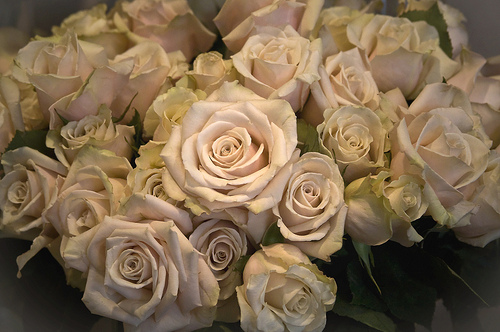

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

In [ ]:
input_shape = (224,224)
batch_size = 32

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=input_shape,
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=input_shape,
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


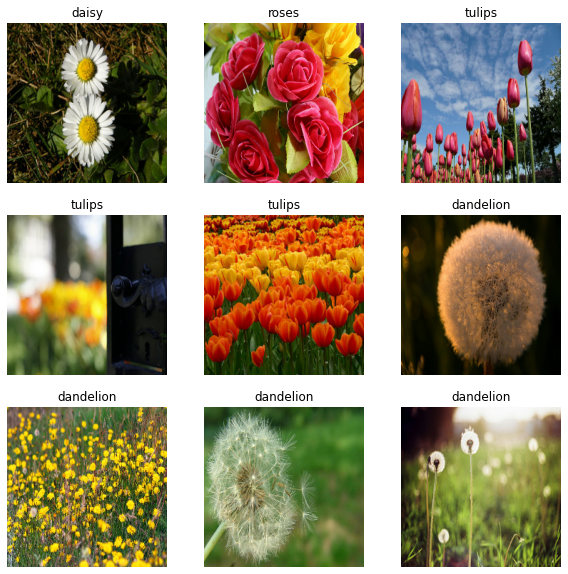

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
image1,label1 = next(iter(train_ds))

In [ ]:
first_image = image1[0]

In [ ]:
print(keras.backend.max(first_image))
print(keras.backend.min(first_image))

tf.Tensor(255.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


In [ ]:
normalize_ds = train_ds.map(lambda x,y : (x / 255.0, y))

In [ ]:
image1,label1 = next(iter(normalize_ds))

In [ ]:
first_image = image1[0]

In [ ]:
print(keras.backend.max(first_image))
print(keras.backend.min(first_image))

tf.Tensor(0.97636074, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


In [ ]:
num_classes = 5
input_shape = (224,224,3)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


92/92 [==============================] - 41s 107ms/step - loss: 1.3606 - acc: 0.4397 - val_loss: 1.0458 - val_acc: 0.5722
Epoch 2/10
92/92 [==============================] - 10s 99ms/step - loss: 0.9751 - acc: 0.6182 - val_loss: 0.9781 - val_acc: 0.6090
Epoch 3/10
92/92 [==============================] - 10s 99ms/step - loss: 0.8056 - acc: 0.6894 - val_loss: 0.9877 - val_acc: 0.6322
Epoch 4/10
92/92 [==============================] - 10s 98ms/step - loss: 0.5920 - acc: 0.7888 - val_loss: 1.1198 - val_acc: 0.5845
Epoch 5/10
92/92 [==============================] - 10s 99ms/step - loss: 0.3829 - acc: 0.8641 - val_loss: 1.2161 - val_acc: 0.6349
Epoch 6/10
92/92 [==============================] - 10s 99ms/step - loss: 0.2207 - acc: 0.9292 - val_loss: 1.4546 - val_acc: 0.6580
Epoch 7/10
92/92 [==============================] - 10s 99ms/step - loss: 0.1249 - acc: 0.9605 - val_loss: 1.6535 - val_acc: 0.6362
Epoch 8/10
92/92 [==============================] - 10s 99ms/step - loss: 0.0519 - acc

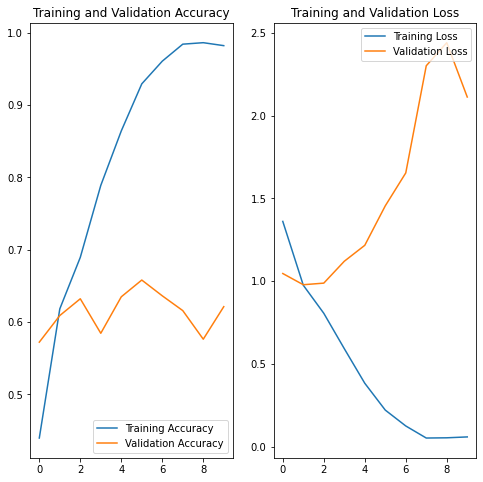

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=input_shape),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


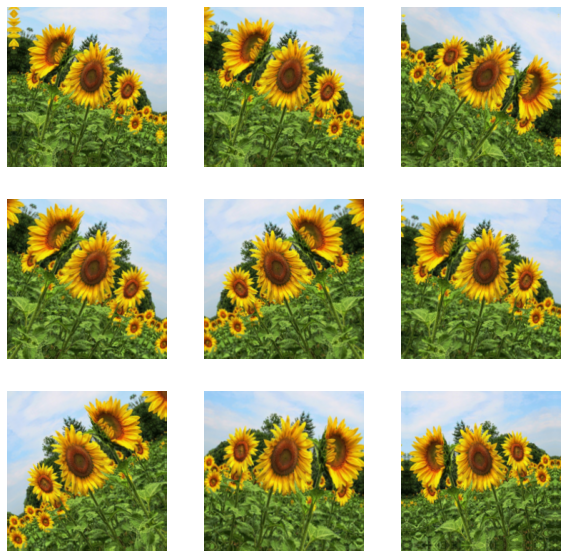

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(2):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=input_shape),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 224, 224, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 224, 224, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                  

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 11s 104ms/step - loss: 1.4337 - accuracy: 0.4114 - val_loss: 1.1115 - val_accuracy: 0.5627
Epoch 2/15
92/92 [==============================] - 10s 103ms/step - loss: 1.0621 - accuracy: 0.5640 - val_loss: 0.9914 - val_accuracy: 0.5981
Epoch 3/15
92/92 [==============================] - 10s 104ms/step - loss: 0.9943 - accuracy: 0.5981 - val_loss: 0.9634 - val_accuracy: 0.6158
Epoch 4/15
92/92 [==============================] - 10s 103ms/step - loss: 0.9360 - accuracy: 0.6260 - val_loss: 0.8924 - val_accuracy: 0.6253
Epoch 5/15
92/92 [==============================] - 10s 103ms/step - loss: 0.8618 - accuracy: 0.6693 - val_loss: 0.9227 - val_accuracy: 0.6362
Epoch 6/15
92/92 [==============================] - 10s 103ms/step - loss: 0.8048 - accuracy: 0.7006 - val_loss: 0.8345 - val_accuracy: 0.6717
Epoch 7/15
92/92 [==============================] - 10s 103ms/step - loss: 0.7844 - accuracy: 0.6982 - val_loss: 0.8043 - val_accuracy: 0.6935

In [ ]:
model = Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=input_shape),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),  
    layers.experimental.preprocessing.Rescaling(1./255),
  
    # VGG 16 model 구현
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512, 3, padding='same', activation='relu'),
    layers.Conv2D(512, 3, padding='same', activation='relu'),
    layers.Conv2D(512, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512, 3, padding='same', activation='relu'),
    layers.Conv2D(512, 3, padding='same', activation='relu'),
    layers.Conv2D(512, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dense(4096, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(num_classes,activation='softmax'),
  
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_2 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation_2 (RandomRo  (None, 224, 224, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_2 (RandomZoom)  (None, 224, 224, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_7 (Conv2D)           (None, 224, 224, 64)      36928     
                                                      

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


92/92 [==============================] - 114s 1s/step - loss: 1.6479 - accuracy: 0.2398 - val_loss: 1.6047 - val_accuracy: 0.2398
Epoch 2/15
92/92 [==============================] - 79s 850ms/step - loss: 1.6021 - accuracy: 0.2459 - val_loss: 1.6025 - val_accuracy: 0.2398
Epoch 3/15
92/92 [==============================] - 79s 849ms/step - loss: 1.6011 - accuracy: 0.2459 - val_loss: 1.6024 - val_accuracy: 0.2398
Epoch 4/15
92/92 [==============================] - 78s 847ms/step - loss: 1.6013 - accuracy: 0.2459 - val_loss: 1.6029 - val_accuracy: 0.2398
Epoch 5/15
92/92 [==============================] - 79s 848ms/step - loss: 1.6009 - accuracy: 0.2459 - val_loss: 1.6027 - val_accuracy: 0.2398
Epoch 6/15
92/92 [==============================] - 78s 847ms/step - loss: 1.6008 - accuracy: 0.2459 - val_loss: 1.6025 - val_accuracy: 0.2398
Epoch 7/15
92/92 [==============================] - 79s 848ms/step - loss: 1.6010 - accuracy: 0.2459 - val_loss: 1.6022 - val_accuracy: 0.2398
Epoch 8/15
9